In [58]:
%matplotlib inline
import monkdata as m

In [2]:
import dtree

In [3]:
dtree.entropy(m.monk3test)

0.9977724720899821

In [4]:
dtree.averageGain(m.monk1, m.attributes[0])

0.07527255560831925

In [5]:
dtree.averageGain(m.monk1, m.attributes[0])

0.07527255560831925

In [6]:
print("MONK-1:")
for i in range(6):
    print(dtree.averageGain(m.monk1, m.attributes[i]))

print("\nMONK-2:")
for i in range(6):
    print(dtree.averageGain(m.monk2, m.attributes[i]))
    
print("\nMONK-3:")
for i in range(6):
    print(dtree.averageGain(m.monk3, m.attributes[i]))

MONK-1:
0.07527255560831925
0.005838429962909286
0.00470756661729721
0.02631169650768228
0.28703074971578435
0.0007578557158638421

MONK-2:
0.0037561773775118823
0.0024584986660830532
0.0010561477158920196
0.015664247292643818
0.01727717693791797
0.006247622236881467

MONK-3:
0.007120868396071844
0.29373617350838865
0.0008311140445336207
0.002891817288654397
0.25591172461972755
0.007077026074097326


In [7]:
# Attribute a5 (index 4) value 1..4
subsets = [dtree.select(m.monk1, m.attributes[4], v) for v in range(1,5)]

for i, s in enumerate(subsets):
    entropy = dtree.entropy(s)
    print("\nSubset {}, entropy {}:".format(i, entropy))
    for attr in [0,1,2,3,5]:
        print(dtree.averageGain(s, m.attributes[attr]))
    


Subset 0, entropy 0.0:
0.0
0.0
0.0
0.0
0.0

Subset 1, entropy 0.9383153522334069:
0.040216841609413634
0.015063475072186083
0.03727262736015946
0.04889220262952931
0.025807284723902146

Subset 2, entropy 0.9480782435939054:
0.03305510013455182
0.002197183539100922
0.017982293842278896
0.01912275517747053
0.04510853782483648

Subset 3, entropy 0.9081783472997051:
0.20629074641530198
0.033898395077640586
0.025906145434984817
0.07593290844153944
0.0033239629631565126


In [10]:
# a5 = 1, one of the truth concepts fulfilled
dtree.mostCommon(subsets[0])

True

In [9]:
# a4
ss1 = [dtree.select(subsets[1], m.attributes[3], v) for v in range(1,4)]
for ss in ss1:
    print(dtree.mostCommon(ss))

# a6
ss2 = [dtree.select(subsets[2], m.attributes[5], v) for v in range(1,3)]
for ss in ss2:
    print(dtree.mostCommon(ss))

# a1 
ss3 = [dtree.select(subsets[3], m.attributes[0], v) for v in range(1,4)]
for ss in ss3:
    print(dtree.mostCommon(ss))

False
False
False
False
False
False
False
True


In [ ]:
import drawtree_qt5 as qt

tree = dtree.buildTree(m.monk1, m.attributes, 2)
qt.drawTree(tree)

In [8]:
tree1 = dtree.buildTree(m.monk1, m.attributes)
tree2 = dtree.buildTree(m.monk2, m.attributes)
tree3 = dtree.buildTree(m.monk3, m.attributes)

print(dtree.check(tree1, m.monk1))
print(dtree.check(tree1, m.monk1test))

print(dtree.check(tree2, m.monk2))
print(dtree.check(tree2, m.monk2test))

print(dtree.check(tree3, m.monk3))
print(dtree.check(tree3, m.monk3test))

1.0
0.8287037037037037
1.0
0.6921296296296297
1.0
0.9444444444444444


In [17]:
import random

def partition(data, fraction):
    ldata = list(data)
    random.shuffle(ldata)
    breakPoint = int(len(ldata) * fraction)
    return ldata[:breakPoint], ldata[breakPoint:]

In [46]:
def prune_while_improving(tree, data, score = None):
    best_score = 0
    if score is None:
        best_score = dtree.check(tree, data)
    else:        
        best_score = score
    #print("Current best: {}".format(best_score))
    best_tree = tree
    
    pruned = dtree.allPruned(tree)
    subtree_bests = [best_score for i in range(len(pruned))]
    subtree_best_trees = [tree for i in range(len(pruned))]
    for i,p in enumerate(pruned):
        p_score = dtree.check(p, data)
        if p_score > subtree_bests[i]:
            #print("{} better than {}".format(p_score, subtree_bests[i]))
            subtree_bests[i], subtree_best_trees[i] = prune_while_improving(p, data, p_score)
            
    best_score = max(subtree_bests)
    best_tree = subtree_best_trees[subtree_bests.index(best_score)]
    #print("Returning...")
    return best_score, best_tree
        

In [110]:
iterations_per_fraction = 200
fractions = [.3, .4, .5, .6, .7, .8, .9]

# MONK-1
print("MONK-1:")
monk1_scores = []
for frac in fractions:
    test_scores = []
    for i in range(iterations_per_fraction):
        monk1train, monk1val = partition(m.monk1, frac)
        part_tree = dtree.buildTree(monk1train, m.attributes)
        best_score, best_tree = prune_while_improving(part_tree, monk1val)
        #print("Best in iteration: {}".format(best_score))
        test_scores.append(dtree.check(best_tree, m.monk1test))
    
    average_test_score = sum(test_scores) / iterations_per_fraction
    monk1_scores.append(test_scores)
    print("Average test score from pruning for fraction {}: {}\n".format(frac, average_test_score))

MONK-1:
Average test score from pruning for fraction 0.3: 0.772002314814814

Average test score from pruning for fraction 0.4: 0.7900231481481483

Average test score from pruning for fraction 0.5: 0.8178356481481481

Average test score from pruning for fraction 0.6: 0.8419907407407408

Average test score from pruning for fraction 0.7: 0.8473958333333329

Average test score from pruning for fraction 0.8: 0.8572685185185184

Average test score from pruning for fraction 0.9: 0.8558912037037034



In [111]:
# MONK-3
print("MONK-3:")
monk3_scores = []
for frac in fractions:
    test_scores = []
    for i in range(iterations_per_fraction):
        monk3train, monk3val = partition(m.monk3, frac)
        part_tree = dtree.buildTree(monk3train, m.attributes)
        best_score, best_tree = prune_while_improving(part_tree, monk3val)
        #print("Best in iteration: {}".format(best_score))
        test_scores.append(dtree.check(best_tree, m.monk3test))
    
    average_test_score = sum(test_scores) / iterations_per_fraction
    monk3_scores.append(test_scores)
    print("Average test score from pruning for fraction {}: {}\n".format(frac, average_test_score))

MONK-3:
Average test score from pruning for fraction 0.3: 0.9170138888888895

Average test score from pruning for fraction 0.4: 0.943333333333334

Average test score from pruning for fraction 0.5: 0.9547569444444456

Average test score from pruning for fraction 0.6: 0.9614814814814823

Average test score from pruning for fraction 0.7: 0.9607870370370373

Average test score from pruning for fraction 0.8: 0.9526851851851859

Average test score from pruning for fraction 0.9: 0.9396990740740742



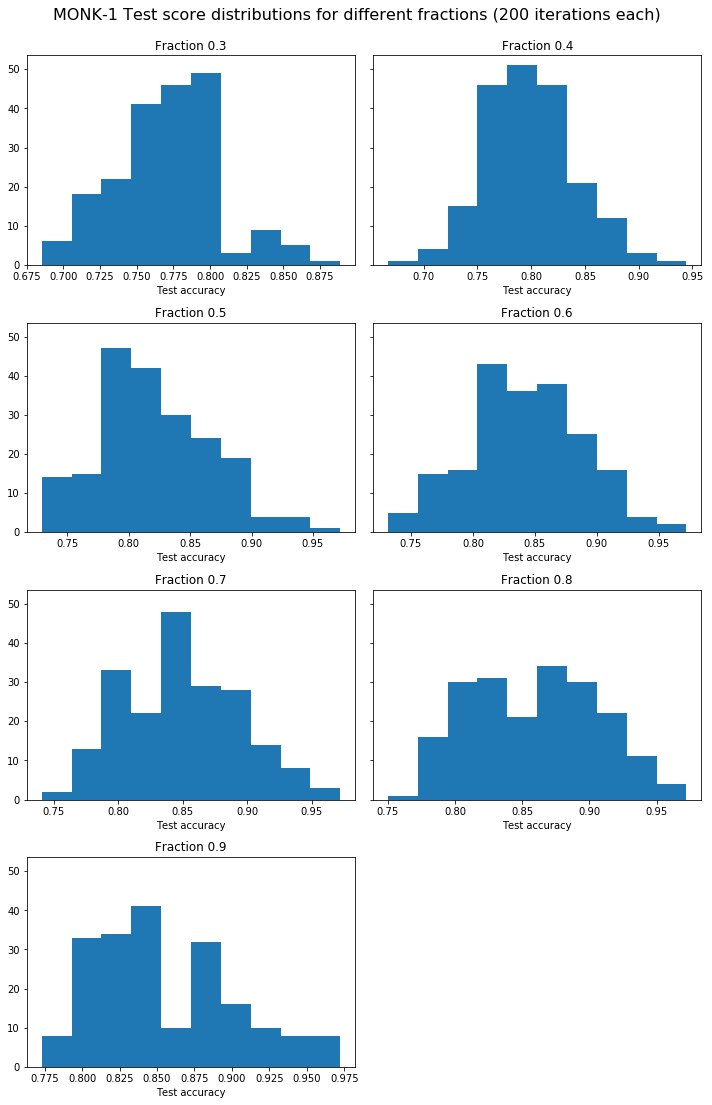

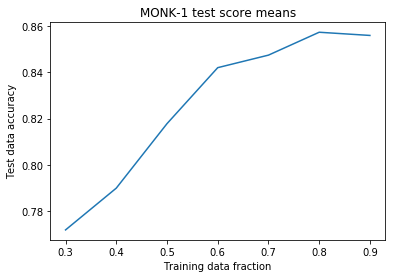

In [119]:
import matplotlib.pyplot as plt

monk1_means = [sum(scores)/len(scores) for scores in monk1_scores]

fig1, axs1 = plt.subplots(4,2, figsize=(10,15), sharey=True, tight_layout=True)
for i, frac in enumerate(fractions):
    figure = axs1.flatten()[i]
    figure.hist(monk1_scores[i])
    figure.set_xlabel("Test accuracy")
    figure.set_title("Fraction {}".format(frac))
    
fig1.suptitle("MONK-1 Test score distributions for different fractions ({} iterations each)".format(iterations_per_fraction), fontsize=16, y=1.02)
fig1.delaxes(axs1[3][1])

plt.figure()
plt.plot([.3, .4, .5, .6, .7, .8, .9], monk1_means)
plt.ylabel('Test data accuracy')
plt.xlabel('Training data fraction')
plt.title("MONK-1 test score means")

plt.show()

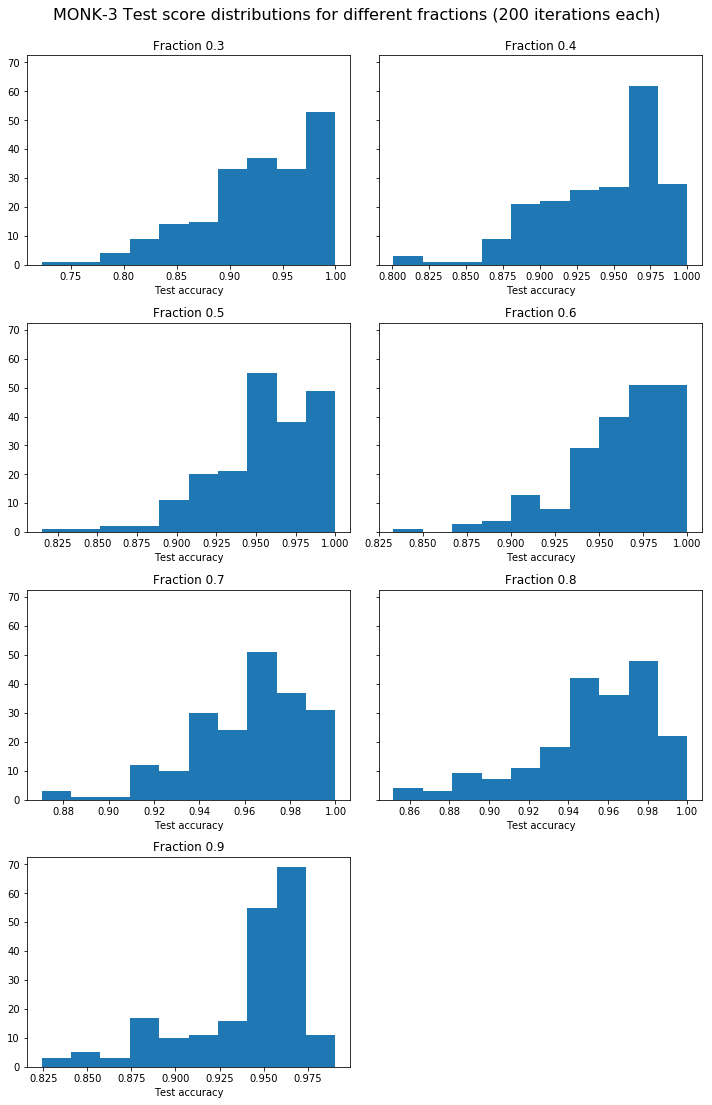

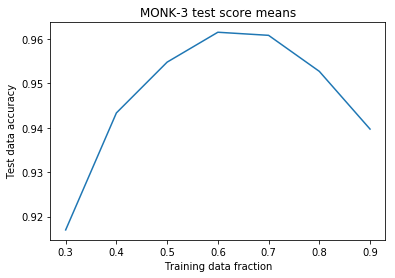

In [118]:
monk3_means = [sum(scores)/len(scores) for scores in monk3_scores]

fig3, axs3 = plt.subplots(4,2, figsize=(10,15), sharey=True, tight_layout=True)
for i, frac in enumerate(fractions):
    figure = axs3.flatten()[i]
    figure.hist(monk3_scores[i])
    figure.set_xlabel("Test accuracy")
    figure.set_title("Fraction {}".format(frac))
    
fig3.suptitle("MONK-3 Test score distributions for different fractions ({} iterations each)".format(iterations_per_fraction), fontsize=16, y=1.02)
fig3.delaxes(axs3[3][1])

plt.figure()
plt.plot([.3, .4, .5, .6, .7, .8, .9], monk3_means)
plt.ylabel('Test data accuracy')
plt.xlabel('Training data fraction')
plt.title("MONK-3 test score means")

plt.show()